## A Comparison of Evolution Stratagy and Reinforcement Learning on a Toy Dataset

In [1]:
# Matplotlib config
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import display
plt.rcParams['image.interpolation'] = 'nearest'
%matplotlib inline

In [2]:
# Import Dependencies 
import os
import sys
import json
import time
import numpy as np
from random import shuffle

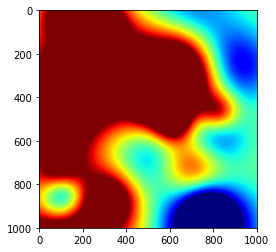

In [7]:
# Import our experiment code

from experiment.Simulation import GaussianLandscape
g = GaussianLandscape(n=30)
g.plot_landscape()


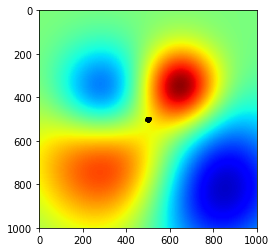

In [8]:
# generate a toy 2D regression dataset
sz = 1000
X,Y = np.meshgrid(np.linspace(-1,1,sz),np.linspace(-1,1,sz))

# Generate four Gaussians

mux,muy,sigma=0.3,-0.3,4
G1 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=-0.3,0.3,2
G2 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=0.6,0.6,2
G3 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=-0.4,-0.2,3
G4 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)

# Combine Gaussians with addition and subtraction
G = G1 + G2 - G3 - G4

# Plot Dataset
fig,ax = plt.subplots()
im = ax.imshow(G, vmin=-1, vmax=1, cmap='jet')
w = np.array([500.0, 500.0]) # start point

noise = np.random.randn(200, 2)
wp = np.expand_dims(w, 0) + sigma*noise
x,y = zip(*wp)
plt.scatter(x,y,4,'k', edgecolors='face')

### NeuroEvolution Solution

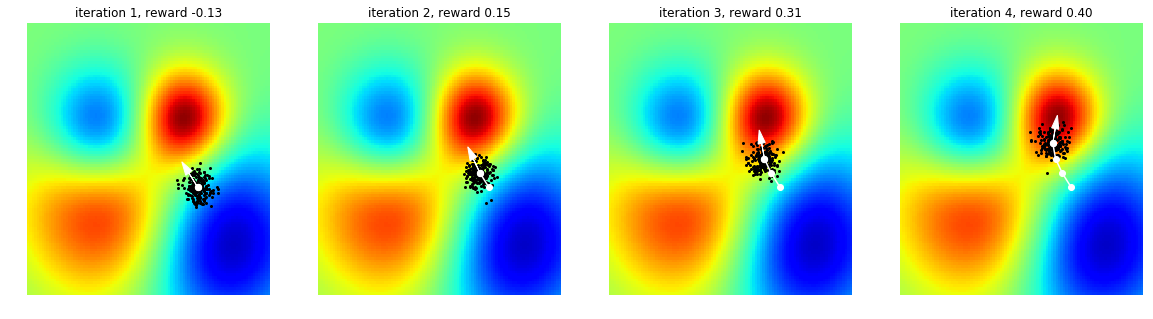

In [17]:
np.random.seed(3)
nn = 4 # number of steps to take (and plot horizontally)
alpha = 0.03 # learning rate
sigma = 3 # standard deviation of the samples around current parameter vector

w = np.array([70.0, 60.0]) # start point
plt.figure(figsize=(20,5))

prevx, prevy = [], []
for q in range(nn):
    
    # draw the optimization landscape
    ax1 = plt.subplot(1,nn,q+1)
    plt.imshow(G, vmin=-1, vmax=1, cmap='jet')

    # draw a population of samples in black
    noise = np.random.randn(200, 2)
    wp = np.expand_dims(w, 0) + sigma*noise
    x,y = zip(*wp)
    plt.scatter(x,y,4,'k', edgecolors='face')

    # draw the current parameter vector in white
    plt.scatter([w[0]],[w[1]],40,'w', edgecolors='face')

    # draw estimated gradient as white arrow
    R = np.array([G[int(wi[1]), int(wi[0])] for wi in wp])
    R -= R.mean()
    R /= R.std() # standardize the rewards to be N(0,1) gaussian
    g = np.dot(R, noise)
    u = alpha * g
    plt.arrow(w[0], w[1], u[0], u[1], head_width=3, head_length=5, fc='w', ec='w')
    plt.axis('off')
    plt.title('iteration %d, reward %.2f' % (q+1, G[int(w[0]), int(w[1])]))
    
    # draw the history of optimization as a white line
    prevx.append(w[0])
    prevy.append(w[1])
    if len(prevx) > 0:
        plt.plot(prevx, prevy, 'wo-')
    
    w += u
    plt.axis('tight')
    
#plt.savefig('evo.png',bbox_inches='tight',pad_inches=0,dpi=200)

### Making it More Challenging

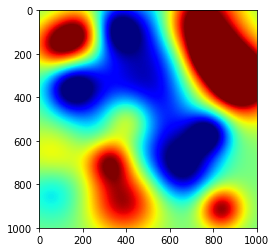

In [27]:
# Import our experiment code

from experiment.Simulation import GaussianLandscape
g = GaussianLandscape(n=20)
g.plot_landscape()


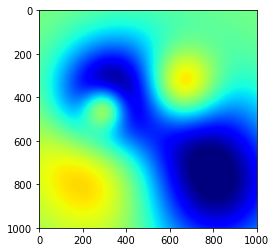

In [33]:
# generate a toy 2D regression dataset
sz = 1000
X,Y = np.meshgrid(np.linspace(-1,1,sz),np.linspace(-1,1,sz))

# Generate four Gaussians
mux,muy,sigma=0.3,-0.3,4
G1 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=-0.3,0.3,2
G2 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=0.6,0.6,2
G3 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=-0.4,-0.2,3
G4 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=-0.4,-0.1,7
G5 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=-0,-0,2
G6 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)

# Combine Gaussians with addition and subtraction
G = G1 + G2 - G3 - G4 + G5 - G6

# Plot Dataset
fig,ax = plt.subplots()
im = ax.imshow(G, vmin=-1, vmax=1, cmap='jet')

IndexError: index 1024 is out of bounds for axis 0 with size 1000

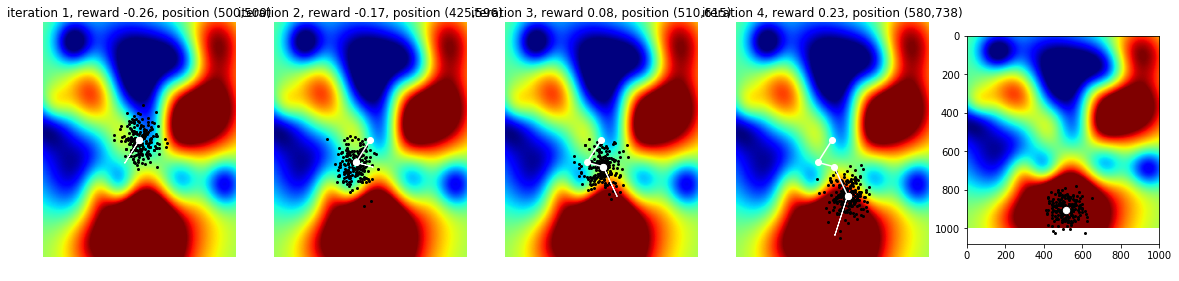

In [36]:
from math import ceil
np.random.seed(3)
nn = 5 # number of steps to take (and plot horizontally)
alpha = 0.9 # learning rate
sigma = 50 # 
pop_size = 500
mm = 5

plt.figure(figsize=(20,5*mm))


for z in range(mm):
    gl = GaussianLandscape(n=30)
    G = gl.combine_gaussians()
    w = np.array([500.0, 500.0]) # start point
    prevx, prevy = [], []
    for q in range(nn):

        # draw the optimization landscape
        m = ceil(nn*mm/5)
        ax1 = plt.subplot(m,5,q+1 + (z*5))

        plt.imshow(G, vmin=-1, vmax=1, cmap='jet')

        # draw a population of samples in black
        noise = np.random.randn(200, 2)
        wp = np.expand_dims(w, 0) + sigma*noise
        x,y = zip(*wp)
        plt.scatter(x,y,4,'k', edgecolors='face')

        # draw the current parameter vector in white
        plt.scatter([w[0]],[w[1]],40,'w', edgecolors='face')

        # draw estimated gradient as white arrow
        R = np.array([G[int(wi[1]), int(wi[0])] for wi in wp])
        R -= R.mean()
        R /= R.std() # standardize the rewards to be N(0,1) gaussian
        g = np.dot(R, noise)
        u = alpha * g
        plt.arrow(w[0], w[1], u[0], u[1], head_width=3, head_length=5, fc='w', ec='w')
        plt.axis('off')
        plt.title('iteration %d, reward %.2f, position (%d,%d)' % (q+1, G[int(w[0]), int(w[1])], w[0],w[1]))

        # draw the history of optimization as a white line
        prevx.append(w[0])
        prevy.append(w[1])
        if len(prevx) > 0:
            plt.plot(prevx, prevy, 'wo-')

        w += u
        plt.axis('tight')

#plt.savefig('evo.png',bbox_inches='tight',pad_inches=0,dpi=200)

##### Reinforcement Learning Solution